0705

# 문제 정의하기
- # 파마족 인디언 당뇨병 발병 유무를 예측하는 이진 분류 문제(1: 당뇨병, 0: 정상)

#데이터 준비하기

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense # 레이어 Dense 층

# 랜덤 시드 고정시키기
np.random.seed(5) 

In [2]:
# 데이터가 숫자로만 되어있어서 전처리 과정이 없어서 판다스를 사용하지 않음
# 판다스로 물러오고 random state로 잘라보고 성능이 더 좋은지 비교하는 과정도 필요

dataset = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

#데이터셋 생성하기 - 입력(속성값(feature) 8개; 문제집 8개), 출력(판정결과 1개; 정답지) 변수로 분리

In [3]:
# 학습 데이터 700개 가져오기

X_train = dataset[:700, 0:8] # 700개 and 8개 변수(컬럼) 바로 가져오기

y_train = dataset[:700, 8]   # y_train 700개 동일하게 자르고 9번째 컬럼 가져오기

# 테스트 데이터 68개 가져오기
X_test = dataset[700:, 0:8] # 700번이후부터 가져오고, 8개 컬럼 가져오기
y_test = dataset[700:, 8]   # 700번이후부터 가졍오고, 9번째 컬럼 가져오기

# 모델 구성하기

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # 첫번째 층에는 input이 몇 개 들어가야 하는지 적어야함 feature가 8개이므로 input_dim=8
model.add(Dense(8, activation='relu')) # 두번 째 층이라 input 안 넣어도 됨
model.add(Dense(1, activation='sigmoid')) # 마지막은 이진분류 마지막 값은 하나로 나와야함

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# 모델 학습과정 설정하기

In [7]:

model.compile(loss='binary_crossentropy', # loss: 손실함수
              optimizer='adam',
              metrics=['accuracy'])       # 학습할 때 뭐를 볼 것인지 => 정확도를 볼 것

# 모델 학습 시키기

In [8]:
history = model.fit(X_train, y_train,
                    epochs=1500,   # 몇 번 공부시킬건지?
                    batch_size=64) # 어떻게 나눠서 공부시킬건지?

                    # loss값이 떨어지면 정확도가 올라가고 있다고 생각하면 됨

Epoch 1/1500
11/11 [==============================] - 14s 2ms/step - loss: 12.1395 - accuracy: 0.3324
Epoch 2/1500
11/11 [==============================] - 0s 2ms/step - loss: 4.3140 - accuracy: 0.4857
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 4.0146 - accuracy: 0.5963
Epoch 4/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.9007 - accuracy: 0.4809
Epoch 5/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.6735 - accuracy: 0.4852
Epoch 6/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.4455 - accuracy: 0.5412
Epoch 7/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.2090 - accuracy: 0.5391
Epoch 8/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.2860 - accuracy: 0.5213
Epoch 9/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.1563 - accuracy: 0.5240
Epoch 10/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.9641 - accuracy: 0.55

#학습결과 그려보기

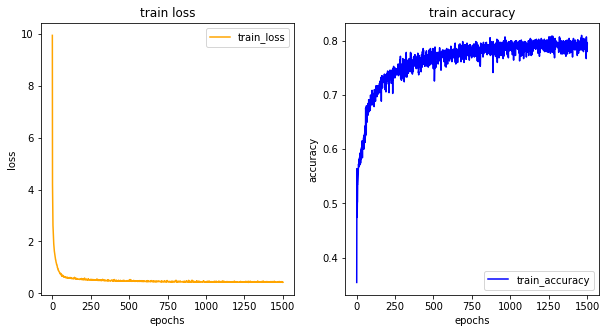

In [11]:
# 받은 코드
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 지글지글한 그래프는 결과가 나올 범위의 폭이 커서 불안한 결과를 얻을 것으로 예측됨

# 모델 평가하기

In [12]:
scores = model.evaluate(X_test, y_test) # ↓ scores[0]에는 손실 함수 값이 들어있어서 [1]을 가져옴
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 68개로 시험을 봤더니 정확도가 76퍼센트 정도로 맞췄다

3/3 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7647
accuracy: 76.47%


# 모델 성능 평가

In [18]:
# ROC
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [15]:
# 모델 예측하기
result = model.predict_classes(X_test)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82        41
         1.0       0.79      0.56      0.65        27

    accuracy                           0.76        68
   macro avg       0.77      0.73      0.74        68
weighted avg       0.77      0.76      0.75        68



In [17]:
print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))
# 스케일 낮추거나, trian와 test를 섞어서 쓰거나 등을 통해 recall 수치를 높일 수 있음

0.7894736842105263
0.5555555555555556


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


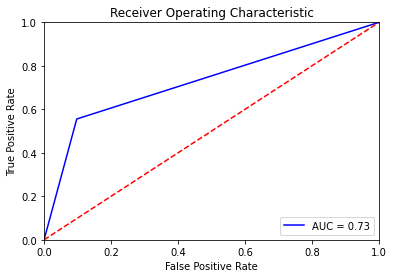

In [19]:
plot_auc_roc(model)